In [3]:
pip install kagglehub

  Obtaining dependency information for kagglehub from https://files.pythonhosted.org/packages/3c/74/10ea2151b11f8591f82d39c70c1dcc43d0160ba41f8ddb644eb1f5eac348/kagglehub-0.3.4-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 2.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zeeshier/weather-forecast-dataset")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 114k/114k [00:00<00:00, 316kB/s]

Extracting files...
Path to dataset files: /Users/deveshsharma/.cache/kagglehub/datasets/zeeshier/weather-forecast-dataset/versions/1


In [5]:
import pandas as pd

In [6]:
df1 = pd.read_csv('/Users/deveshsharma/.cache/kagglehub/datasets/zeeshier/weather-forecast-dataset/versions/1/weather_forecast_data.csv')

In [7]:
df1.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [9]:
df1.shape

(2500, 6)

In [13]:
df1.isnull().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [14]:
df1.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [36]:
df2 = df1.copy()

In [26]:
df2.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [37]:
df2['Rain_num'] = df2['Rain'].apply(lambda x: 1 if x=='rain' else 0)
df2.drop('Rain',axis=1,inplace=True)

In [38]:
df2.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain_num
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0


In [39]:
pd.DataFrame.corr(df2)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain_num
Temperature,1.000000,-0.014119,-0.004957,0.006632,-0.007489,-0.265882
Humidity,-0.014119,1.000000,0.003816,0.007244,-0.032089,0.382464
Wind_Speed,-0.004957,0.003816,1.000000,-0.000405,0.018772,-0.001389
Cloud_Cover,0.006632,0.007244,-0.000405,1.000000,0.023100,0.326216
Pressure,-0.007489,-0.032089,0.018772,0.023100,1.000000,0.008273
Rain_num,-0.265882,0.382464,-0.001389,0.326216,0.008273,1.000000


In [40]:
 pd.DataFrame.corr(df2,method='spearman')

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain_num
Temperature,1.000000,-0.014374,-0.005298,0.006391,-0.008138,-0.264626
Humidity,-0.014374,1.000000,0.003767,0.006983,-0.031760,0.381074
Wind_Speed,-0.005298,0.003767,1.000000,-0.000098,0.019758,-0.001575
Cloud_Cover,0.006391,0.006983,-0.000098,1.000000,0.022935,0.328231
Pressure,-0.008138,-0.031760,0.019758,0.022935,1.000000,0.008334
Rain_num,-0.264626,0.381074,-0.001575,0.328231,0.008334,1.000000


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X = df2.drop('Rain_num',axis=1,inplace=False) #inplace false means it will not drop from original df2 it is droped in X
y= df2['Rain_num']

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression

In [47]:
model = LogisticRegression()

In [61]:
model.fit(X_train,y_train)

LogisticRegression()

In [75]:
prediction = model.predict(X_test)

In [78]:
prediction[1]

0

In [79]:
score = model.score(X_test,y_test)

In [80]:
score

0.932

In [82]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [94]:
cm = metrics.confusion_matrix(y_test,prediction,labels=model.classes_)

In [85]:
cm

array([[429,  14],
       [ 20,  37]])

In [87]:
import numpy as np

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [96]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

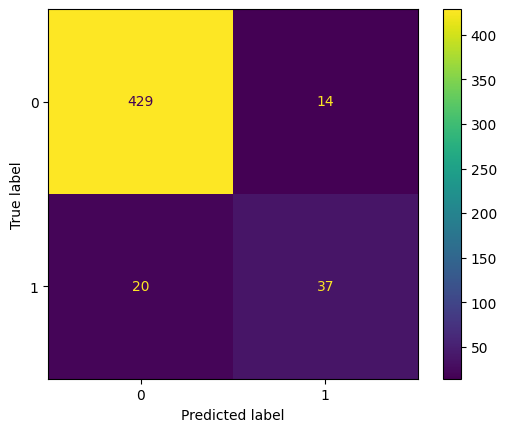

In [97]:
disp.plot()

In [108]:
cd Local\ Disk\ A

Application and admit card/            brcasegtrainer/
BRCASeg/                               gpt_eng_highlighter/
Devesh_Resume_Computer_Vision (1).pdf  photo/
Document Devesh/                       photos/
Study/                                 upsc_chatboat/


In [109]:
import pickle
with open ('weather_forecst_model.pickle','wb') as f:
    pickle.dump(model,f)

In [115]:
import json

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))